# Extracción de datos leyes españolas periodo 1977-2019

* Importación de módulos

In [1]:
import pandas as pd
import scrapping as ws
import Transformer as tr
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Miguel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* Extracción de las leyes desde la página del congreso y creación de un data frame.

In [2]:

url='http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=1979&selectLey=tituloListadoTodasLeyes'
ws.Extract(url,"..\data")

http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=2019&selectLey=tituloListadoTodasLeyes
http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=2018&selectLey=tituloListadoTodasLeyes
http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=2017&selectLey=tituloListadoTodasLeyes
http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=2016&selectLey=tituloListadoTodasLeyes
http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=2015&selectLey=tituloLis

http://www.congreso.es/portal/page/portal/Congreso/Congreso/Iniciativas/LeyesAprob?_piref73_1335447_73_1335446_1335446.next_page=/wc/busquedasLeyesAprobadas&anoLey=1977&selectLey=tituloListadoTodasLeyes


In [3]:
df_leyes=pd.read_csv(r'..\data\leyes.txt', encoding='UTF-8',sep=";")

In [4]:
df_leyes.head()

,NOMBRE_LEY,AÑO,TIPO_LEY,TITULO_LEY
0,Ley Orgánica 1/2019,2019,Ley Orgánica,"Ley Orgánica 1/2019, de 20 de febrero, por la ..."
1,Ley Orgánica 2/2019,2019,Ley Orgánica,"Ley Orgánica 2/2019, de 1 de marzo, de modific..."
2,Ley Orgánica 3/2019,2019,Ley Orgánica,"Ley Orgánica 3/2019, de 12 de marzo, de reform..."
3,Ley 1/2019,2019,Ley,"Ley 1/2019, de 20 de febrero, de Secretos Empr..."
4,Ley 2/2019,2019,Ley,"Ley 2/2019, de 1 de marzo, por la que se modif..."


* Transformamos y normalizamos los datos aplicando técnicas de mineria de textos.

In [5]:
fercuencias=tr.Transform(df_leyes)

In [6]:
fercuencias.head()

AÑO
1977    {'ley': 48, 'octubr': 6, 'amnist': 2, 'boe': 4...
1978    {'ley': 332, 'ener': 108, 'presupuest': 66, 'g...
1980    {'ley': 254, 'organ': 38, 'ener': 58, 'consej'...
1981    {'ley': 160, 'organ': 28, 'abril': 32, 'estatu...
1982    {'ley': 192, 'organ': 34, 'may': 36, 'protecci...
Name: TITULO_LEY, dtype: object

* Creamos una visualización de los datos más representativos de cada año

1977


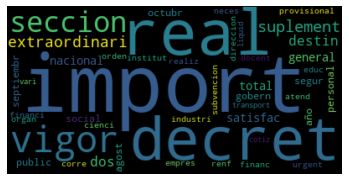

1978


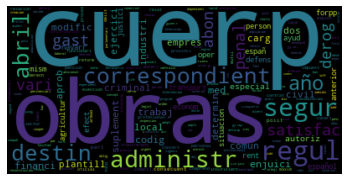

1979


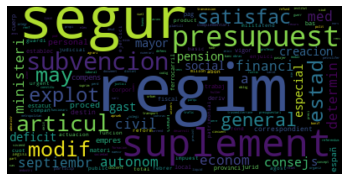

1980


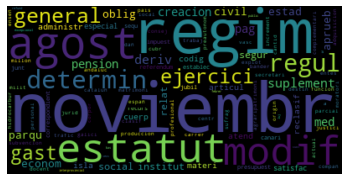

1981


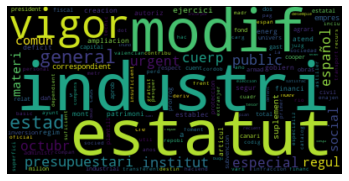

1982


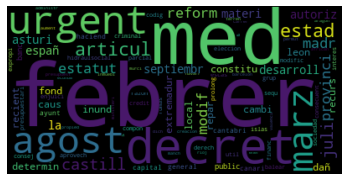

1983


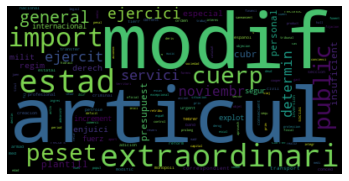

1984


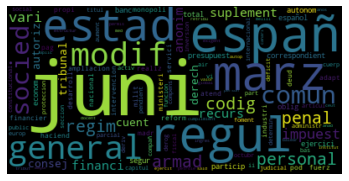

1985


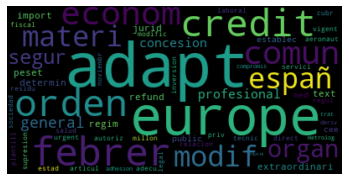

1986


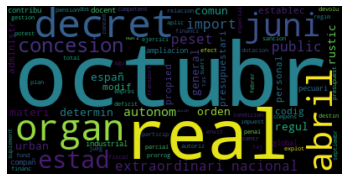

1987


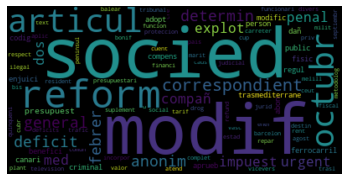

1988


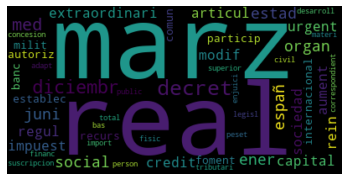

1989


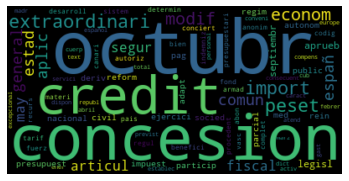

1990


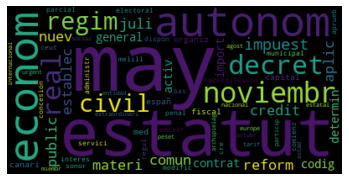

1991


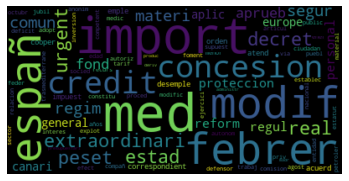

1992


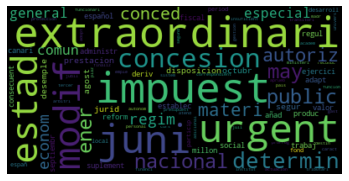

1993


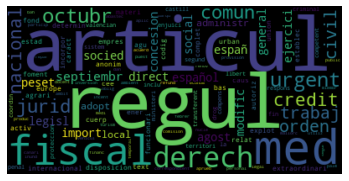

1994


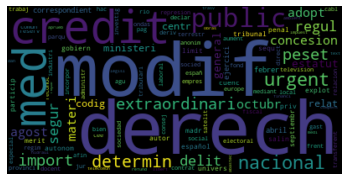

1995


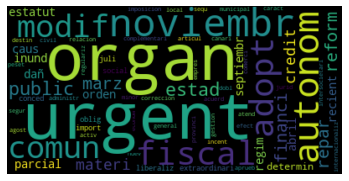

1996


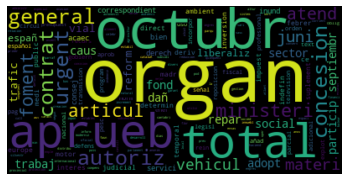

1997


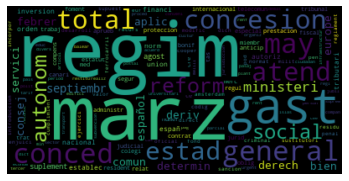

1998


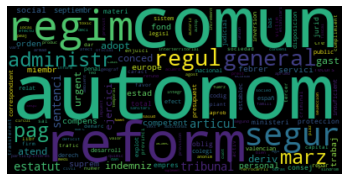

1999


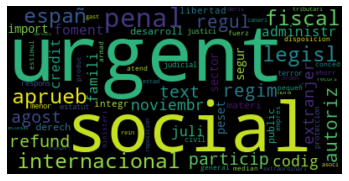

2000


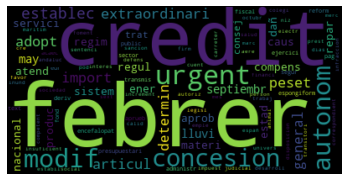

2001


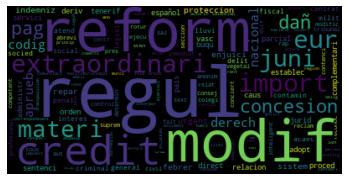

2002


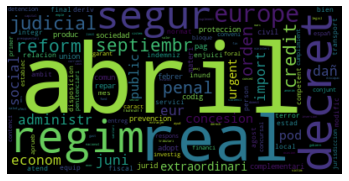

2003


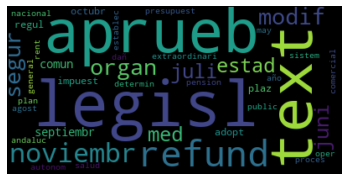

2004


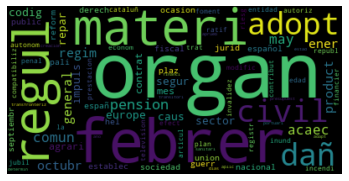

2005


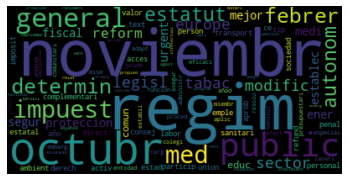

2006


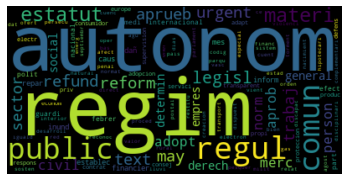

2007


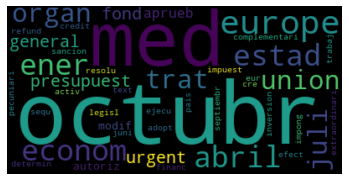

2008


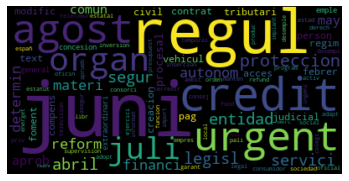

2009


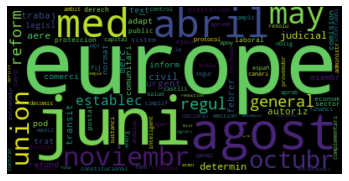

2010


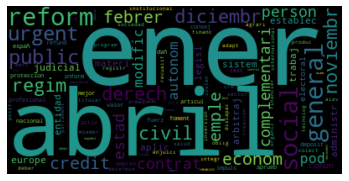

2011


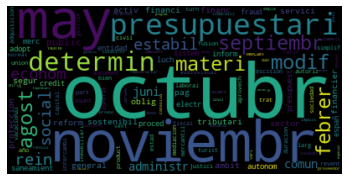

2012


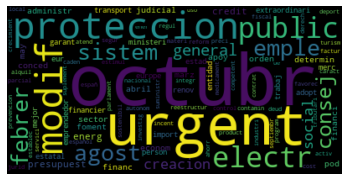

2013


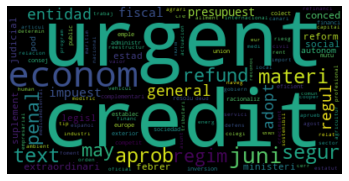

2014


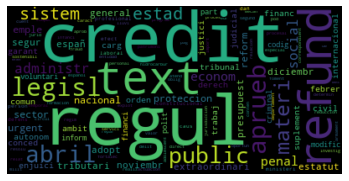

2015


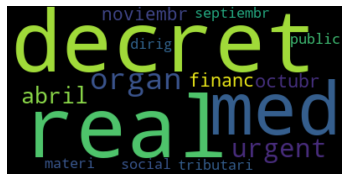

2016


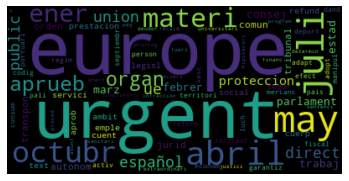

2017


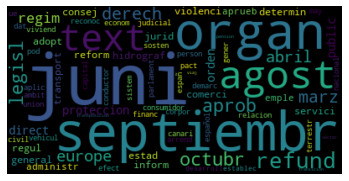

2018


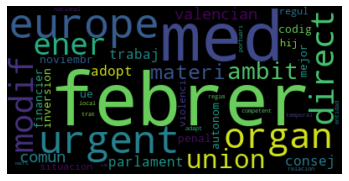

2019


ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 432x288 with 0 Axes>

In [7]:
year=1977
for D in fercuencias:
    #D = fercuencias[3]
    
    print(year)
    filter_words = dict([(key, value) for key, value in D.items() if value > 3 and value < 20])

    wcloud = WordCloud().generate_from_frequencies(filter_words)

    # Plotting the wordcloud
    plt.imshow(wcloud, interpolation="bilinear")

    plt.axis("off")
    (-0.5, 399.5, 199.5, -0.5)
    plt.show()
    plt.savefig(f'..\output\{year}.png')
    year+=1
    
